In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df_train.shape

(891, 12)

In [161]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

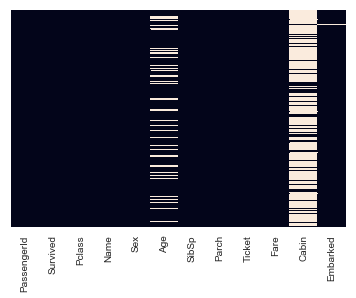

In [162]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

In [163]:
df_train.drop(['Cabin'],axis=1, inplace=True)
df_train.shape

(891, 11)

In [164]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [165]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [166]:
df= pd.get_dummies(df_train['Sex'], drop_first=True)
df_train.drop(['Sex'], axis=1, inplace=True)
df_train = pd.concat([df_train,df],axis=1, sort=False)
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [167]:
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [168]:
df_train.shape

(891, 8)

In [169]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [170]:
# df= pd.get_dummies(df_train['Embarked'], drop_first=True)
# df_train.drop(['Embarked'], axis=1, inplace=True)
# df_train = pd.concat([df_train,df],axis=1, sort=False)
# df_train.head()
df_train.drop('Embarked', axis=1, inplace=True)

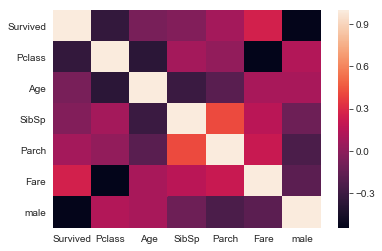

In [171]:
sns.heatmap(df_train.corr())

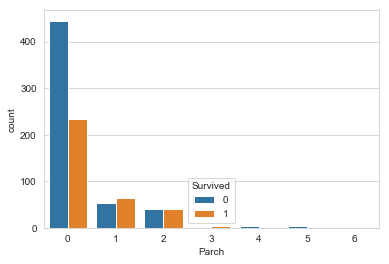

In [172]:
sns.set_style('whitegrid')
sns.countplot(x= 'Parch',hue='Survived' ,data=df_train)

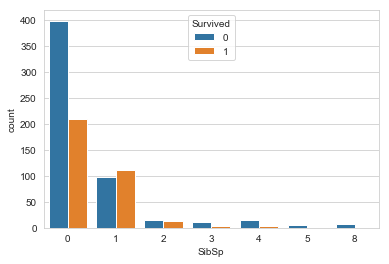

In [173]:
sns.set_style('whitegrid')
sns.countplot(x= 'SibSp',hue='Survived' ,data=df_train)

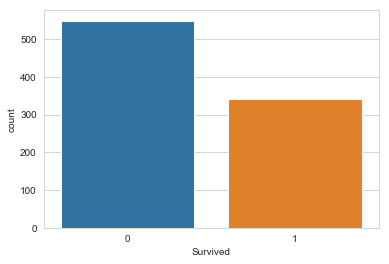

In [174]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_train)

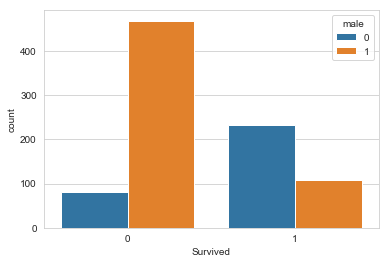

In [175]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue ='male', data=df_train )

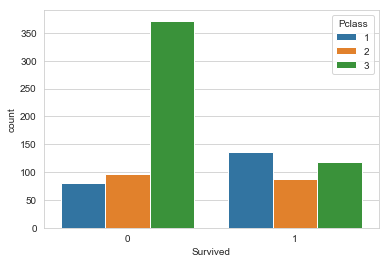

In [176]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue ='Pclass', data=df_train )

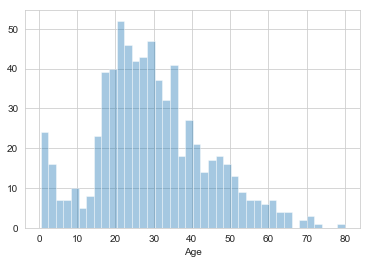

In [177]:
sns.distplot(df_train['Age'].dropna(), kde=False, bins=40)

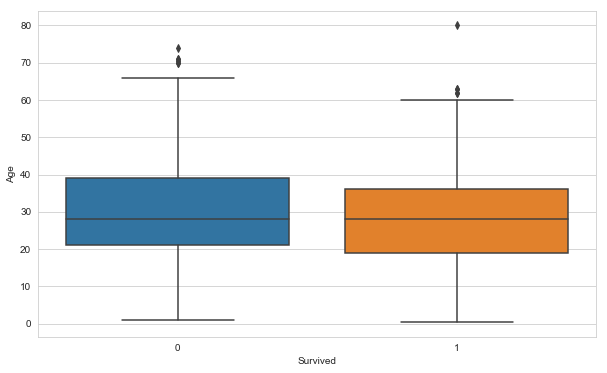

In [178]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=df_train)

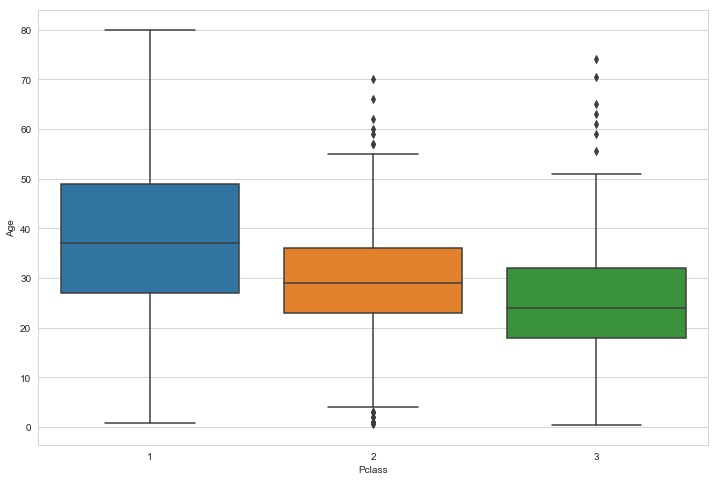

In [179]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data= df_train )

In [180]:
def rand_sample_impute(df, variable):
    df[variable+'_random'] = df[variable]
    # It will have the random samples to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same indices im order to merge the data seta
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [181]:
rand_sample_impute(df_train, 'Age')

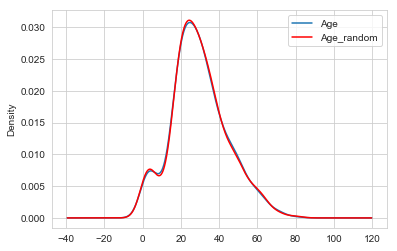

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_train.Age.plot(kind = 'kde', ax=ax)
df_train.Age_random.plot(kind ='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [183]:
df_train.drop('Age', axis=1, inplace=True)

In [184]:
df_train.rename(columns={'Age_random': 'Age'}, inplace=True)
df_train.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Age
0,0,3,1,0,7.2500,1,22.0
1,1,1,1,0,71.2833,0,38.0
2,1,3,0,0,7.9250,0,26.0
3,1,1,1,0,53.1000,0,35.0
4,0,3,0,0,8.0500,1,35.0


In [185]:
df_train.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
male        0
Age         0
dtype: int64

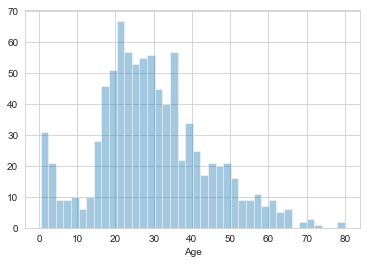

In [186]:
sns.distplot(df_train['Age'], kde=False, bins=40)

In [187]:
df_train.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Age
0,0,3,1,0,7.2500,1,22.0
1,1,1,1,0,71.2833,0,38.0
2,1,3,0,0,7.9250,0,26.0
3,1,1,1,0,53.1000,0,35.0
4,0,3,0,0,8.0500,1,35.0


In [188]:
y = df_train['Survived']
df_train.drop(['Survived'], axis=1, inplace=True)
X=df_train
X.shape

(891, 6)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=7)

In [190]:
%store -r df_test

In [191]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [192]:
hyper_para = {
        'n_estimators': [10,15,35, 25,50,100,300,500,700,1000,1500],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2,3,5,7,8,10],
        'min_samples_leaf': [10,15,17,23,15,30,35,40,43,50],
        'random_state': [20, 25,27, 31, 44, 18, 35, 40, 101]
}

In [195]:
from sklearn.model_selection import RandomizedSearchCV
r_cv = RandomizedSearchCV(estimator = rf,  param_distributions= hyper_para, 
                         cv=6, n_iter=100, scoring = 'accuracy',
                         n_jobs=-1, verbose=5 , return_train_score=True,
                         random_state=70)

In [196]:
r_cv.fit(X,y)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   59.2s finished


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 15, 35, 25, 50, 100, 300, 500, 700, 1000, 1500], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 5, 7, 8, 10], 'min_samples_leaf': [10, 15, 17, 23, 15, 30, 35, 40, 43, 50], 'random_state': [20, 25, 27, 31, 44, 18, 35, 40, 101]},
          pre_dispatch='2*n_jobs', random_state=70, refit=True,
          return_train_score=True, scoring='accuracy', verbose=5)

In [197]:
r_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [198]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [199]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [200]:
rf_pred=rf.predict(df_test)
rf_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [201]:
pred = pd.DataFrame(rf_pred)
sub_df = pd.read_csv('gender_submission.csv')
dataset = pd.concat([sub_df['PassengerId'],pred], axis=1)
dataset.columns = ['PassengerId', 'Survived']
dataset.to_csv('gender_submission.csv', index=False)

### Accuracy on Kaggle Leaderboard: 79.18%
After submitting the test data prediction result, I got an accuracy score of 0.79186 on kaggle leaderboard which is under top 9% of the total submission of this challenge.